In [1]:
# Import necessary packages

import math
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import datetime as dt
import statsmodels.formula.api as smf
import matplotlib.pyplot as pl
import requests, zipfile
import io
#StringIO

%matplotlib inline 

In [3]:
# Load September 2014 data in Pandas dataframe from a zip file at a URL

r = requests.get('https://s3.amazonaws.com/tripdata/201409-citibike-tripdata.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(z.open('201409-citibike-tripdata.csv'))

In [9]:
#split data into age columns by gender
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

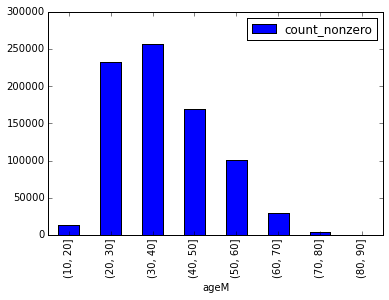

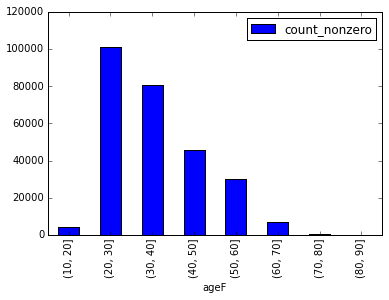

In [12]:
#divide age into bins, plot the ranges

bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.002142
(20, 30]       0.085274
(30, 40]       0.066613
(40, 50]       0.026568
(50, 60]       0.013234
(60, 70]       0.001732
(70, 80]       0.000218
(80, 90]       0.000000


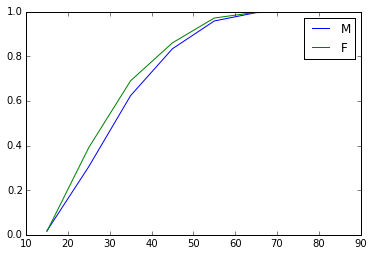

In [16]:
#this is how the NORMALIZED cumulative distributions look like
#to read an observed distribution like a probablility distribution i have to normalize it

#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [21]:
ks_age=scipy.stats.ks_2samp(df.ageM, df.ageF)
print(ks_age)

Ks_2sampResult(statistic=0.41804483061551573, pvalue=0.0)


** This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.  For our purposes, we have a p value of 0.0 which is less than our implied alpha of 0.05, so we reject this Null hypothesis.**

**with a 95% CI we can say that the two samples resemble the same continuous distribution**

In [26]:
a = df.ageM[~np.isnan(df.ageM)]
a = a.sample(269400, replace = False)
b = df.ageF[~np.isnan(df.ageF)]

pearson_age = scipy.stats.pearsonr(a, b)
print(pearson_age)

(0.0002454522329956446, 0.89862512880997403)


**The Pearson R coefficient measures the correlation between 2 datasets.  We have a 0 correlation (which implies that the samples are not correlation at all).  The p value for this is ~0.9 so we would fail to reject the Null hypothesis that the tests not correlated.**

In [23]:
spearman_age =scipy.stats.spearmanr(df.ageM, df.ageF, axis = 0)
print(spearman_age)

SpearmanrResult(correlation=-0.39210819260476637, pvalue=0.0)


**The Spearman R coefficient measures the correlation between 2 datasets.  We have a -0.3 correlation (which implies that the samples are slightly negatively correlated).  The p value for this is 0 so we would reject the Null hypothesis that the tests not correlated.**

#Age Distributions of Daytime vs. Nighttime Riders
Daytime = 6am to 6pm

In [39]:
temp = pd.DatetimeIndex(df['starttime'])


#get dummies only seems to be taking in one parameter at a time
df['early'] = pd.get_dummies(temp.hour < 6)[1]
df['late'] = pd.get_dummies(temp.hour > 18)[1]
df['night_indicator'] = df['early'] + df['late']
#need to figure out how to drop early and late columns


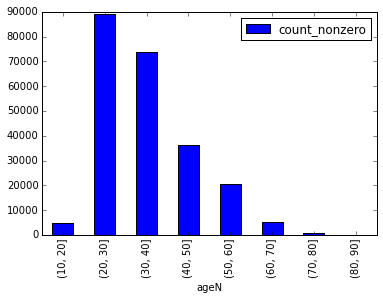

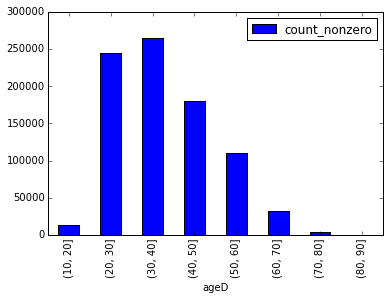

In [40]:
#night and day people
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['night_indicator'] == 1)]
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['night_indicator'] == 0)]

#divide age into bins, plot the ranges

bins = np.arange(10, 99, 10)
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([np.count_nonzero]).plot(kind='bar')
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([np.count_nonzero]).plot(kind='bar')

          count_nonzero
ageN                   
(10, 20]       0.004638
(20, 30]       0.103082
(30, 40]       0.111231
(40, 50]       0.056708
(50, 60]       0.015861
(60, 70]       0.001597
(70, 80]       0.000046
(80, 90]       0.000000


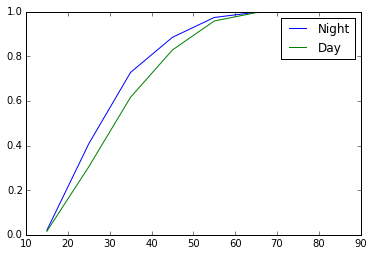

In [42]:
#this is how the NORMALIZED cumulative distributions look like
#to read an observed distribution like a probablility distribution i have to normalize it

#print df.ageS, df.ageS.cumsum()

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([np.count_nonzero]).cumsum()

csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([np.count_nonzero]).cumsum()

print (np.abs(csN / csN.max()-csD / csD.max()))

pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.legend()

In [43]:
ks_night=scipy.stats.ks_2samp(df.ageN, df.ageD)
print(ks_night)

Ks_2sampResult(statistic=0.48036945054621272, pvalue=0.0)


** This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.  For our purposes, we have a p value of 0.0 which is less than our implied alpha of 0.05, so we reject this Null hypothesis.**

**with a 95% CI we can say that the two samples resemble the same continuous distribution**

In [57]:
c = df.ageN[~np.isnan(df.ageN)]
c = c.sample(230027, replace = False)
d = df.ageD[~np.isnan(df.ageD)]
d = d.sample(230027, replace = False)

pearson_night = scipy.stats.pearsonr(c, d)
print(pearson_night)

(0.0016226435631375303, 0.43643079713759103)


**The Pearson R coefficient measures the correlation between 2 datasets.  We have a 0 correlation (which implies that the samples are not correlation at all).  The p value for this is ~0.9 so we would fail to reject the Null hypothesis that the samples are not correlated.**

In [50]:
spearman_night =scipy.stats.spearmanr(df.ageN, df.ageD, axis = 0)
print(spearman_night)

SpearmanrResult(correlation=-0.32192635911984702, pvalue=0.0)


**The Spearman R coefficient measures the correlation between 2 datasets.  We have a -0.3 correlation (which implies that the samples are slightly negatively correlated).  The p value for this is 0 so we would reject the Null hypothesis that the samples not correlated.**